Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions.
Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels including:

Normal (N),
Diabetes (D),
Glaucoma (G),
Cataract (C),
Age related Macular Degeneration (A),
Hypertension (H),
Pathological Myopia (M),
Other diseases/abnormalities (O)

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import PIL
import pathlib
import tensorflow as tf

In [54]:
df = pd.read_csv("raw_data/full_df.csv")

In [84]:
df.head(8)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg


In [66]:
df.filepath[0]

'../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/0_right.jpg'

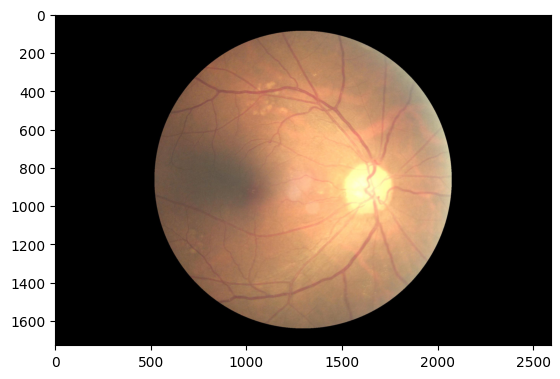

In [67]:
path = 'raw_data/ODIR-5K/ODIR-5K/Training Images'
image = mpimg.imread(f"{path}/{df.filename[100]}")
plt.imshow(image);

In [58]:
image.shape

(1728, 2592, 3)

In [59]:
pixels = image.shape[0]*image.shape[1]
pixels

4478976

In [60]:


# Load an example image as a Tensor (replace with your image path)
image_path = f"{path}/{df.filename[100]}"
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image)  # Decode the image (adjust for PNG if needed)

# Original shape
print("Original shape:", image.shape)




Original shape: (1728, 2592, 3)
Resized shape: (100, 100, 3)


In [65]:
size_shapes = []
for n in range(len(df)):
    image_path = f"{path}/{df.filename[n]}"
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image)
    size_shapes.append(image.shape)

size_shapes
    


[TensorShape([1728, 2304, 3]),
 TensorShape([2304, 3456, 3]),
 TensorShape([1536, 2048, 3]),
 TensorShape([894, 1920, 3]),
 TensorShape([1728, 2304, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([2400, 2400, 3]),
 TensorShape([1536, 2048, 3]),
 TensorShape([2000, 2584, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([1934, 1956, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([2592, 3888, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([1152, 1536, 3]),
 TensorShape([894, 1920, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([2304, 3456, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([1296, 1936, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([1536, 2048, 3]),
 TensorShape([1296, 1936, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([2976, 2976, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([1728, 2592, 3]),
 TensorShape([1951, 2584, 3]),
 TensorSha

In [78]:
x_size =  [size_shapes[n][0] for n in range(len(df))]
min_x_index = x_size.index(min(x_size)) 
min_index

75

In [79]:
y_size =  [size_shapes[n][1] for n in range(len(df))]
min_y_index = y_size.index(min(y_size)) 
min_index

75

In [80]:
min(y_size)

250

In [77]:
size_shapes[75]

TensorShape([188, 250, 3])

In [81]:
min([size_shapes[n][1]*size_shapes[n][0] for n in range(len(df))])

47000

In [82]:
188*250

47000

In [83]:
# Resize the image
new_height, new_width = 100, 100  # Specify the target dimensions
resized_image = tf.image.resize(image, [new_height, new_width])

# Optional: Cast to integer for saving or display
resized_image = tf.cast(resized_image, tf.uint8)

print("Resized shape:", resized_image.shape)

Resized shape: (100, 100, 3)
